In [9]:
%matplotlib notebook

In [10]:
import matplotlib
print(matplotlib.get_backend())

notebook


In [11]:
%matplotlib widget

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

def animate_player_movement(df, nflId, gameId, playId):
    """
    Animate player movement on an NFL field with additional validation
    """
    # Print input parameters for debugging
    print(f"Searching for: nflId={nflId}, gameId={gameId}, playId={playId}")
    
    # Filter data and add debug prints
    player_data = df[(df['nflId'] == nflId) & 
                     (df['gameId'] == gameId) & 
                     (df['playId'] == playId)].copy()
    
    print(f"Found {len(player_data)} rows of data for this player/game/play")
    
    # Validate that we have data
    if len(player_data) == 0:
        raise ValueError("No data found for the specified player, game, and play combination")
    
    # Print first few rows of filtered data
    print("\nFirst few rows of filtered data:")
    print(player_data[['frameId', 'x', 'y']].head())
    
    # Extract coordinates and ensure they're valid
    x_coords = player_data['x'].values
    y_coords = player_data['y'].values
    frames = player_data['frameId'].values
    
    # Validate coordinates
    if len(x_coords) == 0 or len(y_coords) == 0:
        raise ValueError("No coordinate data found")
    
    print(f"\nCoordinate ranges:")
    print(f"X: {min(x_coords):.2f} to {max(x_coords):.2f}")
    print(f"Y: {min(y_coords):.2f} to {max(y_coords):.2f}")
    
    # Create figure and set up the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Set up the field
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.grid(True)
    ax.set_title(f"Player {nflId} Movement\nGame {gameId}, Play {playId}")
    ax.set_xlabel("Field Length (yards)")
    ax.set_ylabel("Field Width (yards)")
    
    # Initialize player position and trail
    player_dot, = ax.plot([x_coords[0]], [y_coords[0]], 'bo', markersize=10, label='Player')
    trail, = ax.plot([], [], 'b-', alpha=0.3)
    trail_length = 10
    
    def init():
        player_dot.set_data([x_coords[0]], [y_coords[0]])
        trail.set_data([], [])
        return player_dot, trail
    
    def update(frame_idx):
        # Update player position
        current_x = x_coords[frame_idx]
        current_y = y_coords[frame_idx]
        player_dot.set_data([current_x], [current_y])
        
        # Update trail
        start_idx = max(0, frame_idx - trail_length)
        trail.set_data(x_coords[start_idx:frame_idx + 1], 
                      y_coords[start_idx:frame_idx + 1])
        
        return player_dot, trail
    
    # Create the animation
    anim = FuncAnimation(fig, update, 
                        frames=len(frames),
                        init_func=init,
                        blit=True,
                        interval=100,
                        repeat=True)
    
    ax.legend()
    plt.close()
    return anim

# Example usage with error handling:
try:
    # Load and check the data
    df = pd.read_csv('tracking_week_1.csv')
    print("\nDataframe Info:")
    print(df.info())
    
    # Print unique values for debugging
    print("\nUnique NFL IDs:", df['nflId'].unique())
    print("\nUnique Game IDs:", df['gameId'].unique())
    print("\nUnique Play IDs:", df['playId'].unique())
    
    # Create and display the animation
    anim = animate_player_movement(df, nflId=35459, gameId=2022091200, playId=64)
    
    # Display the animation
    from IPython.display import display
    display(anim.to_jshtml())
    
except FileNotFoundError:
    print("Error: tracking_week_1.csv file not found. Please check the file path.")
except ValueError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    import traceback
    traceback.print_exc()


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7104700 entries, 0 to 7104699
Data columns (total 18 columns):
 #   Column         Dtype  
---  ------         -----  
 0   gameId         int64  
 1   playId         int64  
 2   nflId          float64
 3   displayName    object 
 4   frameId        int64  
 5   frameType      object 
 6   time           object 
 7   jerseyNumber   float64
 8   club           object 
 9   playDirection  object 
 10  x              float64
 11  y              float64
 12  s              float64
 13  a              float64
 14  dis            float64
 15  o              float64
 16  dir            float64
 17  event          object 
dtypes: float64(9), int64(3), object(6)
memory usage: 975.7+ MB
None

Unique NFL IDs: [35459. 39987. 41310. ... 53641. 48482. 54554.]

Unique Game IDs: [2022091200 2022091113 2022091108 2022091112 2022091111 2022091110
 2022091109 2022091107 2022091106 2022091105 2022091104 2022091103
 2022091102 2022091101 2

'\n<link rel="stylesheet"\nhref="https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/css/font-awesome.min.css">\n<script language="javascript">\n  function isInternetExplorer() {\n    ua = navigator.userAgent;\n    /* MSIE used to detect old browsers and Trident used to newer ones*/\n    return ua.indexOf("MSIE ") > -1 || ua.indexOf("Trident/") > -1;\n  }\n\n  /* Define the Animation class */\n  function Animation(frames, img_id, slider_id, interval, loop_select_id){\n    this.img_id = img_id;\n    this.slider_id = slider_id;\n    this.loop_select_id = loop_select_id;\n    this.interval = interval;\n    this.current_frame = 0;\n    this.direction = 0;\n    this.timer = null;\n    this.frames = new Array(frames.length);\n\n    for (var i=0; i<frames.length; i++)\n    {\n     this.frames[i] = new Image();\n     this.frames[i].src = frames[i];\n    }\n    var slider = document.getElementById(this.slider_id);\n    slider.max = this.frames.length - 1;\n    if (isInternetExplorer()) {\n      

In [7]:
print(df.head())

       gameId  playId    nflId     displayName  frameId    frameType  \
0  2022091200      64  35459.0  Kareem Jackson        1  BEFORE_SNAP   
1  2022091200      64  35459.0  Kareem Jackson        2  BEFORE_SNAP   
2  2022091200      64  35459.0  Kareem Jackson        3  BEFORE_SNAP   
3  2022091200      64  35459.0  Kareem Jackson        4  BEFORE_SNAP   
4  2022091200      64  35459.0  Kareem Jackson        5  BEFORE_SNAP   

                    time  jerseyNumber club playDirection      x      y     s  \
0  2022-09-13 00:16:03.5          22.0  DEN         right  51.06  28.55  0.72   
1  2022-09-13 00:16:03.6          22.0  DEN         right  51.13  28.57  0.71   
2  2022-09-13 00:16:03.7          22.0  DEN         right  51.20  28.59  0.69   
3  2022-09-13 00:16:03.8          22.0  DEN         right  51.26  28.62  0.67   
4  2022-09-13 00:16:03.9          22.0  DEN         right  51.32  28.65  0.65   

      a   dis       o    dir                 event  
0  0.37  0.07  246.17  68.3

In [4]:
# Example usage
# Load the tracking_week.csv
df = pd.read_csv('tracking_week_1.csv')

In [5]:
# Parameters: nflId (player), gameId, playId
animate_player_movement(df, nflId=35459, gameId=2022091200, playId=64)

<IPython.core.display.Javascript object>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

def init_player_markers(ax, unique_players, play_data):
    player_markers = {}
    team_colors = {
        'DEN': 'orange', 'SEA': 'green', 'TB': 'red', 'DAL': 'navy',
        'TEN': 'lightblue', 'NYG': 'blue', 'MIN': 'purple', 'GB': 'green',
        'LV': 'black', 'LAC': 'yellow', 'KC': 'red', 'ARI': 'darkred',
        'JAX': 'teal', 'WAS': 'burgundy', 'NYJ': 'green', 'BAL': 'purple',
        'MIA': 'aqua', 'NE': 'navy', 'IND': 'blue', 'HOU': 'darkblue',
        'PHI': 'darkgreen', 'DET': 'blue', 'CIN': 'orange', 'PIT': 'yellow',
        'SF': 'red', 'CHI': 'darkorange', 'CLE': 'brown', 'CAR': 'lightblue',
        'NO': 'black', 'ATL': 'red', 'BUF': 'blue', 'LA': 'blue'
    }
    football_color = 'brown'

    try:
        for player_id in unique_players:
            if pd.isna(player_id):
                player_markers[player_id] = ax.plot([], [], 'o', color=football_color, 
                                                  markersize=10, label='Football')[0]
            else:
                # Handle potential KeyError if player's team is not found
                player_data = play_data[play_data['nflId'] == player_id]
                if not player_data.empty:
                    team = player_data['club'].iloc[0]
                    color = team_colors.get(team, 'gray')  # Use gray as fallback color
                    player_markers[player_id] = ax.plot([], [], 'o', color=color)[0]
        
        return player_markers
    except Exception as e:
        print(f"Error initializing player markers: {str(e)}")
        raise

def update_player_positions(frame, play_data, player_markers):
    try:
        current_frame_data = play_data[play_data['frameId'] == frame]
        
        for player_id, marker in player_markers.items():
            player_data = current_frame_data[
                pd.isna(current_frame_data['nflId']) if pd.isna(player_id) 
                else (current_frame_data['nflId'] == player_id)
            ]
            
            if not player_data.empty:
                x, y = player_data['x'].iloc[0], player_data['y'].iloc[0]
                marker.set_data(x, y)
        
        return list(player_markers.values())
    except Exception as e:
        print(f"Error updating positions for frame {frame}: {str(e)}")
        return []

def animate_play(df, gameId, playId):
    try:
        # Input validation
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input 'df' must be a pandas DataFrame")
        
        required_columns = ['gameId', 'playId', 'frameId', 'nflId', 'x', 'y', 'club']
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"DataFrame missing required columns: {missing_columns}")
        
        # Filter data
        play_data = df[(df['gameId'] == gameId) & (df['playId'] == playId)]
        if play_data.empty:
            raise ValueError(f"No data found for game {gameId}, play {playId}")
        
        # Extract unique players
        unique_players = play_data['nflId'].unique()
        
        # Set up the plot
        plt.style.use('dark_background')  # Better visibility
        fig, ax = plt.subplots(figsize=(15, 8))
        ax.set_xlim(0, 120)
        ax.set_ylim(0, 53.3)
        ax.set_title(f"Game {gameId}, Play {playId} - Player Movement", pad=15)
        ax.grid(True, alpha=0.3)
        
        # Add field markers
        for i in range(0, 120, 10):
            ax.axvline(x=i, color='white', alpha=0.2)
            ax.text(i + 5, 2, str(i), ha='center', color='white', alpha=0.5)
        
        # Initialize markers
        player_markers = init_player_markers(ax, unique_players, play_data)
        
        # Create animation
        anim = FuncAnimation(
            fig, 
            update_player_positions,
            frames=sorted(play_data['frameId'].unique()),
            fargs=(play_data, player_markers),
            blit=True,
            interval=100,
            repeat=True
        )
        
        plt.tight_layout()
        plt.show()
        return anim
        
    except Exception as e:
        print(f"Error in animate_play: {str(e)}")
        plt.close()  # Clean up any partial figure
        raise

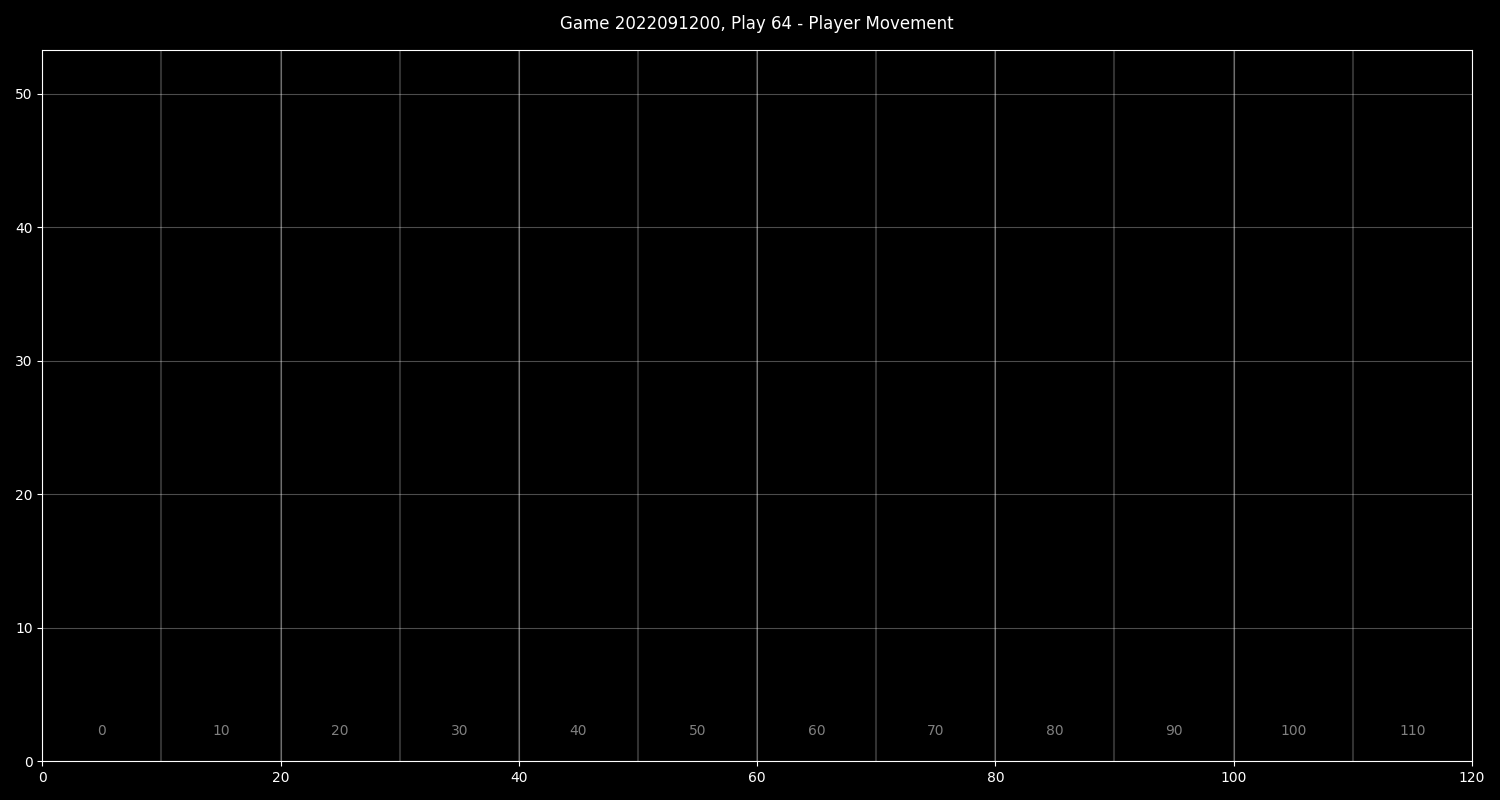

In [13]:
# Animate a play with all players and football
animate_play(df, gameId=2022091200, playId=64)

In [7]:
df.club.unique()

array(['DEN', 'SEA', 'football', 'TB', 'DAL', 'TEN', 'NYG', 'MIN', 'GB',
       'LV', 'LAC', 'KC', 'ARI', 'JAX', 'WAS', 'NYJ', 'BAL', 'MIA', 'NE',
       'IND', 'HOU', 'PHI', 'DET', 'CIN', 'PIT', 'SF', 'CHI', 'CLE',
       'CAR', 'NO', 'ATL', 'BUF', 'LA'], dtype=object)